Привет, Максим!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<div class="alert alert-block alert-info">
<b>Привет Дуолан</b> Красивое имя<br>
    Не знаю как так получилось, но этот проект это не то, что отправлял <br>
    Отсутствует последний блок с анализом модели и финальным выводом<br>
    С другой стороны почти ни чего не надо писать уже всё готово <br>
    Кроме места с линейной регрессией и кодированием <br>
    Но это конечно странно, потому, что другого файла нет он всего один и перепутать невозможно<br>
    И теперь надо вызывать Малдера и Скалли из сериала про необъяснимые и таинственные истории<br>
    Что бы они разобрались<br>

    


</div>

<div class="alert alert-block alert-warning">
Мне понятно, что яндекс погряз в бюрократии и многие продукты могли быть лучше<br>
    В частности возможность проверить свой блокнот после загрузки на проверку<br>
    Предполагаю, что Jupyter Hub развёрнут на Yandex Sphere <br>
    Попробовал пробный период и впечатление, `отстой $полный^3$` и можно понять почему Hub регулярно ложиться<br>
    
    А когда работаешь на своей стороне, то нет возможности проверить сцену после загрузки, вот и случаются такие ситуёвины
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Привет! Спасибо) Это якутское имя.
    
Мне понравился твой проект! Спасибо за качественную работу 👍🏻
    
Критических замечаний нет 👌🏻
</div>

# Определение стоимости автомобилей

# Цель

Для сервиса не «Не бит, не крашен» разработать модель для определения рыночной стоимости автомобиля<br>
Модель будет использована в приложении с целью привлечения новых клиентов<br> 



Заказчику важны:<br>

- качество предсказания<br>
- скорость предсказания<br>
- время обучения<br>

Данные хранятся в файле https://code.s3.yandex.net/datasets/autos.csv<br>

Признаки<br>
- DateCrawled — дата скачивания анкеты из базы<br>
- VehicleType — тип автомобильного кузова<br>
- RegistrationYear — год регистрации автомобиля<br>
- Gearbox — тип коробки передач<br>
- Power — мощность (л. с.)<br>
- Model — модель автомобиля<br>
- Kilometer — пробег (км)<br>
- RegistrationMonth — месяц регистрации автомобиля<br>
- FuelType — тип топлива<br>
- Brand — марка автомобиля<br>
- Repaired — была машина в ремонте или нет<br>
- DateCreated — дата создания анкеты<br>
- NumberOfPictures — количество фотографий автомобиля<br>
- PostalCode — почтовый индекс владельца анкеты (пользователя)<br>
- LastSeen — дата последней активности пользователя<br>

Целевой признак<br>
- Price — цена (евро)<br>


Для оценки качества модели использовать метрику RMSE<br>
Значение метрики должно быть меньше 2500<br>
<br>
Для оптимизации модели построить градиентный бустинг средствами библиотеки LightGBM<br>

<div class="alert alert-block alert-success">
<b>Успех:</b> 

Отличное введение 👍 Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение :)
</div>

## Подготовка данных

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
from catboost import Pool, CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [22]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [23]:
try:
    import optuna
except:
    %pip install optuna
import optuna
from optuna.integration import LightGBMPruningCallback

In [24]:
try:
    import phik
except:
    %pip install phik
import phik

In [25]:
try:
    data = pd.read_csv('autos.csv')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')
  

In [26]:
# зададим константы
NAME_DATA = 'autos.csv'
RANDOM_STATE = 6568

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

In [27]:
def isna_count_procent(data, name):
    '''
    Создадим таблицу с пропусками в  дата сете
    Всего три столбца 
    1. процентное отношение пропусков к длине
    2. количество пропусков в единицах
    3. тип
    Далее блок выводит всю доступную информацию о данных 
    Несколько первых строк
    Описание числовых признаков
    Описание категориальных признаков
    
    '''
    isna_columns = data.isna().sum() > 0
    type_ = pd.DataFrame(data[data.isna().sum()[isna_columns].index.tolist()].dtypes)[0]
    isna_columns = pd.DataFrame([data.isna().sum()[isna_columns]/data.shape[0], data.isna().sum()[isna_columns]]).T
    isna_columns = isna_columns.rename(columns={0: 'procent', 1: 'count'})
    isna_columns['type'] = type_[0]
    isna_columns['count'] = isna_columns['count'].map('{:,.2f}'.format)
    isna_columns['procent'] = isna_columns['procent'].map('{:,.2%}'.format)
    isna_columns = isna_columns.sort_values('procent', ascending=False)
    # блок показывае всё о данных
    display(data.head(5))
    print('#'*55)
    print()
    display(data.describe(include=np.number))
    print()
    display(data.describe(include=np.object_))
    print('#'*55)
    print()
    data.info()
    print('#'*55)
    isna = data.isna().sum().sum()
    isna_procent = len(isna_columns)/data.shape[1]
    s = data.duplicated().sum()
    print(f'Количество дубликатов в данных  равно {s}')
    print()
    print(f'Всего пропусков в {name} {isna:,} шт. в {len(isna_columns)} столбцах')
    print(f'В процентном отношении {isna_procent:.2%} от {data.shape[1]:,} признаков')
  
    print()
    return display(isna_columns), pd.set_option('display.max_rows', None)

In [28]:
isna_count_procent(data, 'autos.csv')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


#######################################################



,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,Repaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


#######################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen   

,procent,count,type
FuelType,9.28%,"32,895.00",object
Gearbox,5.60%,"19,833.00",object
Model,5.56%,"19,705.00",object
Repaired,20.08%,"71,154.00",object
VehicleType,10.58%,"37,490.00",object


(None, None)

Представлен табличный формат размером 354,369 объектов с 16 признаками<br>
Большое количество пропусков, 181,077 шт. в 5 столбцах все категориального типа `object`<br>
Три столбца подходят для формата DataTame – DateCrawled, DateCreated, LastSeen <br>
Но не в одном из них количество объектов не соответствует уникальным, надо проверить и определить наиболее подходящий<br>

В числовых данных пропусков нет, но присутствуют выбросы как например в столбцах `Power`,  `Price` есть значения равные `0`<br>
В признаке `RegistrationYear` присутствуют значения `1000 и 9999` что явно свидетельствует об ошибках в данных<br>
Есть 4 полных дубликата которые мы удалим незамедлительно<br>
Признак `numberofpictures` понулям все строки описания удалим его

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

In [29]:
# удалим дубоикаты в данных
data = data.drop_duplicates().reset_index(drop=True)

s = data.duplicated().sum()
print(f'Количество дубликатов в данных  равно {s}')
print(f'Количество строк insurance.csv после удаления дубликатов {data.shape[0]:,}')

Количество дубликатов в данных  равно 0
Количество строк insurance.csv после удаления дубликатов 354,365


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

In [30]:
# поправим названия признаков 
data.columns = data.columns.str.lower() 
pd.DataFrame(data.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen


In [31]:
data = data.drop(columns=['numberofpictures'], axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

определимся с признаком дата

In [32]:
display(data[['datecrawled', 'datecreated', 'lastseen']].describe(include=np.object_))

,datecrawled,datecreated,lastseen
count,354365,354365,354365
unique,271174,109,179150
top,2016-03-24 14:49:47,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,13718,17


Все признаки приведям к формату `datatime`


In [33]:
data['datecrawled'] = pd.DatetimeIndex(data['datecrawled'])
data['datecreated'] = pd.DatetimeIndex(data['datecreated'])
data['lastseen'] = pd.DatetimeIndex(data['lastseen'])

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

создадим списки с признаками отсортированными по типу

In [34]:
object_columns = data.select_dtypes(object).columns.to_list()
int64_columns  = [x for x in data.columns if data[x].dtypes == 'int64' and data[x].mean() != 0]
int64_columns.sort(key='price'.__eq__)

поспотрим как стоимость разбросана по времени

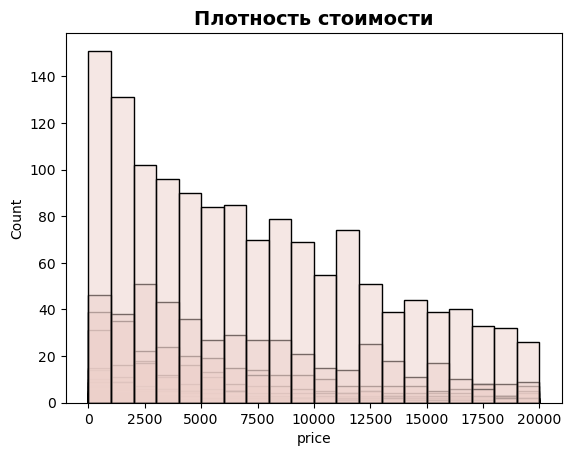

In [35]:
datecrawled_exam = data.groupby('price')['datecrawled'].agg('count').reset_index().sort_values(by='datecrawled').copy()
sns.histplot(data = datecrawled_exam, hue='datecrawled', x='price', bins=20, linewidth=1, legend=False) \
    .set_title(f'Плотность стоимости', dict(fontweight='bold', fontsize=14));


Всё логично большее количество по времени размещали объявления с меньшей стоимостью и по мере увеличения стоимости<br>
Количество уменьшается)

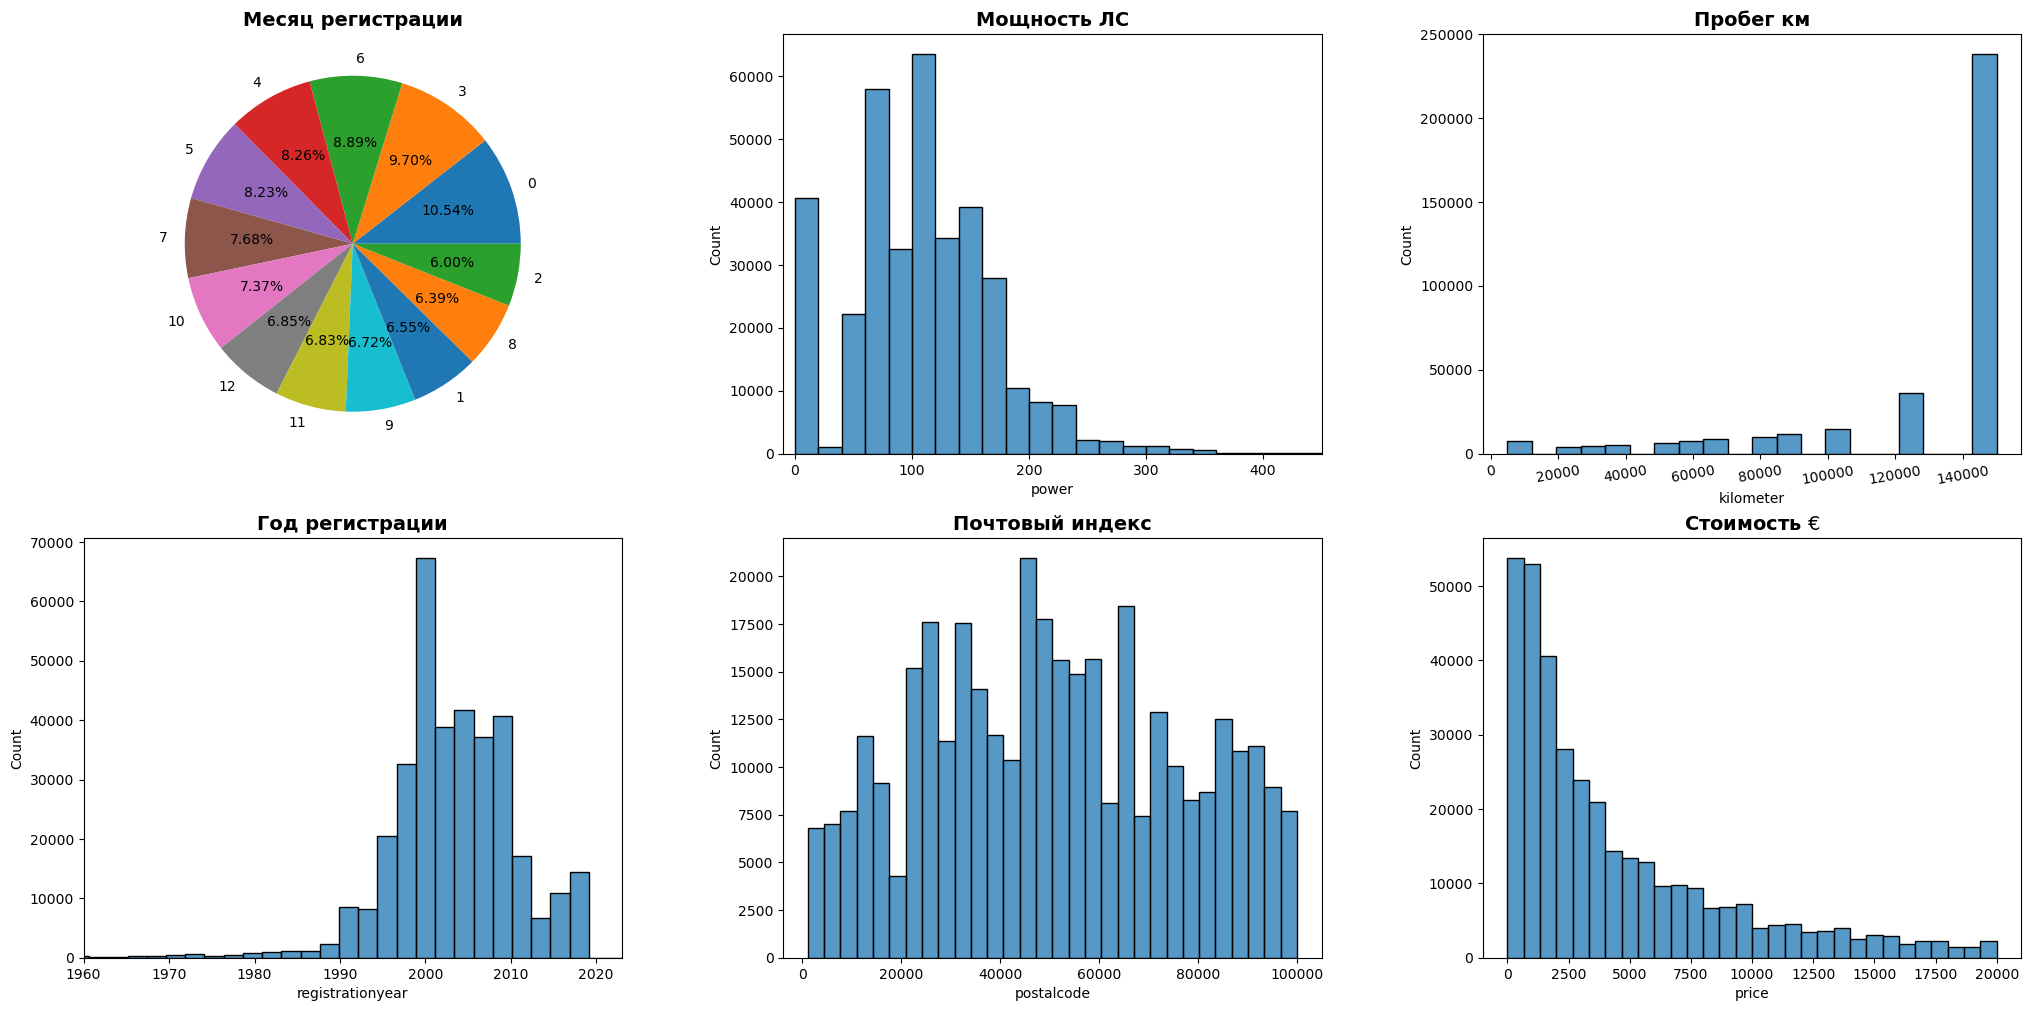

In [36]:
# функция гистограммы данных

def data_hist(data, name_data):
    fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(25, 12))
    plt.subplots_adjust(wspace=0.3)
    data['registrationmonth'].value_counts().plot.pie( ylabel='', autopct='%1.2f%%', legend=False, ax=ax);
    sns.histplot(data = data['power'], edgecolor='black', bins=1000, linewidth=1, ax=ax1);
    sns.histplot(data = data['kilometer'], edgecolor='black', bins=20, linewidth=1, ax=ax2);
    sns.histplot(data = data['registrationyear'], edgecolor='black', bins=4000, linewidth=1, ax=ax3);
    sns.histplot(data = data['postalcode'], edgecolor='black', bins=30, linewidth=1, ax=ax4);
    sns.histplot(data = data['price'], edgecolor='black', bins=30, linewidth=1, ax=ax5);

    ax3.set_xlim(1960,2023)
    ax1.set_xlim(-10,450)
    ax3.set_title(f'Год регистрации', dict(fontweight='bold', fontsize=14));
    ax1.set_title(f'Мощность ЛС', dict(fontweight='bold', fontsize=14));
    ax2.set_title(f'Пробег км', dict(fontweight='bold', fontsize=14));
    ax.set_title(f'Месяц регистрации', dict(fontweight='bold', fontsize=14));
    ax4.set_title(f'Почтовый индекс', dict(fontweight='bold', fontsize=14));
    ax5.set_title(f'Стоимость $€$', dict(fontweight='bold', fontsize=14));
    ax2.tick_params(axis='x', labelrotation=10)
    plt.show()
data_hist(data[int64_columns], 'int64')

В признаке `power` и `registrationmonth` есть нулевые значения<br>
Распределения со сдвигами и несколькими пиками  `registrationyear`, `postalcode`<br>
Признак `price` имеет распределение с левым обрывом<br>

In [37]:
print('Объектов с мощьностью меньше 50 л.с.', (data['power'] < 50).sum())
print('Из них равных нулю ', (data['power'] == 0).sum())

Объектов с мощьностью меньше 50 л.с. 46172
Из них равных нулю  40225


Признак `power` богат объектами с мощностью меньше 50 л.с. это явная ошибка<br>
Заполним эти объекты средним <br>
Поскольку только в признаке `brand` нет пропусков будим считать среднюю группируя по нему <br>

In [38]:
result =  data.copy()
result['power'] = result['power'].replace({val: np.nan for val in data['power'] if val < 50})
result['power'] = result.groupby(['brand'])['power'].transform(lambda x: x.fillna(x.mean()).astype(int))

In [39]:
print('Количество numpy.nan пропусков после заполнения =',result['power'].isna().sum())

Количество numpy.nan пропусков после заполнения = 0


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

Построим гистограмму и boxplot графики до и после заполнения для оценки качества заполнения признака `power`<br>







In [40]:
def hist_box(data, column):
    fig, (ax, ax1, ax2, ax3) = plt.subplots(1,4, figsize=(18, 4))
    data.groupby(['brand', 'model', ])[column].agg('mean').plot(kind='hist', bins=40, ax=ax)
    data.groupby(['brand', 'model', ])[column].agg('mean').plot(kind='box',  ax=ax1)

    result.groupby(['brand', 'model'])[column].agg('mean').plot(kind='hist', bins=40, ax=ax2)
    result.groupby(['brand', 'model'])[column].agg('mean').plot(kind='box',  ax=ax3)

    fig.text(0.3, 1, f'Сравниваем изменение в признаке {column.upper()} до и после заполнения', dict(fontweight='bold', fontsize=18))
    ax.set_title(f'{column} гистограмма до', dict(fontweight='bold', fontsize=15))
    ax1.set_title(f'{column} boxplot до', dict(fontweight='bold', fontsize=15))
    ax2.set_title(f'{column} гистограмма после', dict(fontweight='bold', fontsize=15))
    ax3.set_title(f'{column} boxplot после', dict(fontweight='bold', fontsize=15))

plt.show()

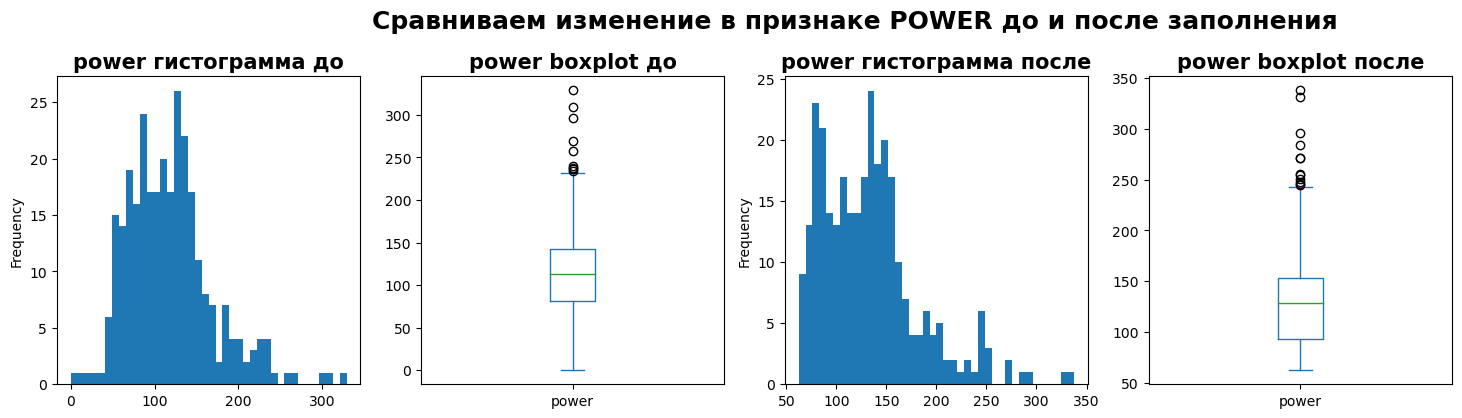

In [41]:
hist_box(data, 'power')

Мы заполнили нулевые значения признака `power` средним значением агрегированным по признаку `brand`<br>
Сравнения гистограммы и boxplot графиков до и после заполнения подтверждают, что данные заполнены корректно<br>
С максимальным сохранением изначального распределения <br>




In [42]:
data = result

В признаке `price` есть значения равные нулю посмотрим на них<br>
И меньше 100 евро

In [43]:
(data['price'] == 0).sum()

10772

In [44]:
(data['price'] < 100).sum()

13314

Заполним их средним значение агрегированным по бренду

In [45]:
result =  data.copy()
result['price'] = result['price'].replace({val: np.nan for val in data['price'] if val < 100})
result['price'] = result.groupby(['brand'])['price'].transform(lambda x: x.fillna(x.mean()).astype(int))

In [46]:
print('Количество numpy.nan пропусков после заполнения =',result['price'].isna().sum())

Количество numpy.nan пропусков после заполнения = 0


Построим гистограмму и boxplot графики до и после заполнения для оценки качества заполнения признака `price`<br>


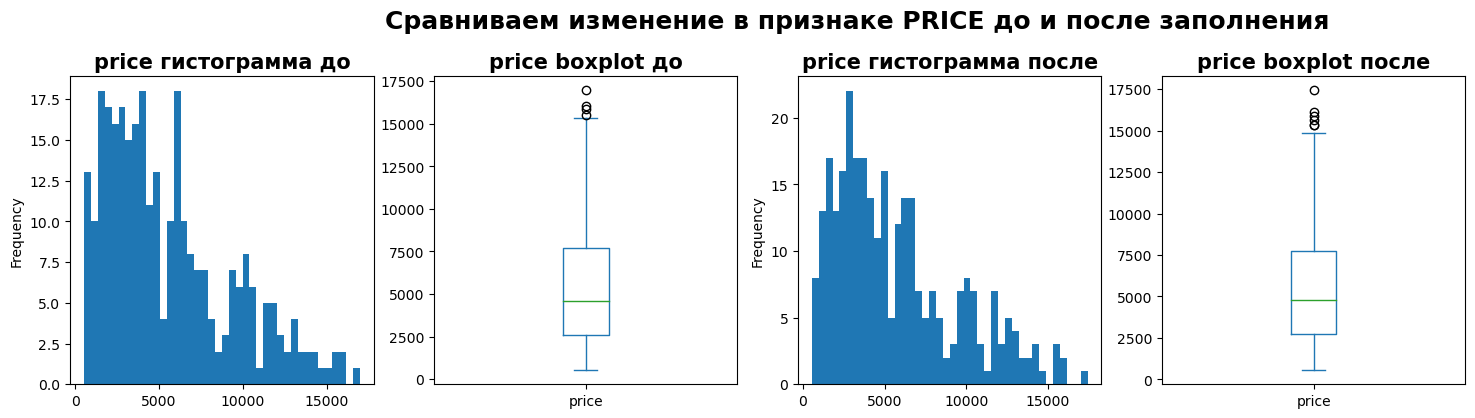

In [47]:
hist_box(data, 'price')

Визуально распределение средней цены сгруппированной по модели и марки изменилось не значительно<br>
Средняя немного увеличилось, что мы ожидали заполнение выполнено корректно

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

Удалим все выбросы в числовых данных используя размах ящика с усами
Напишим функцию

In [48]:
data = result

In [49]:
def cut_crap(data, columns):
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    min_ = q1-(1.5*(q3-q1))
    max_ = q3+(1.5*(q3-q1))
    data = data[~((data[columns] < min_) | (data[columns] > max_)).any(axis=1)]
    return data

Построим график и на выбросы в числовых признаках используя ящик с усами

In [50]:
def box_mustache(data, columns):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.boxplot(data[columns], labels=columns)
    ax.set_title('График ящик с усами числовых признаков', dict(fontweight='bold', fontsize=15))
    plt.show()

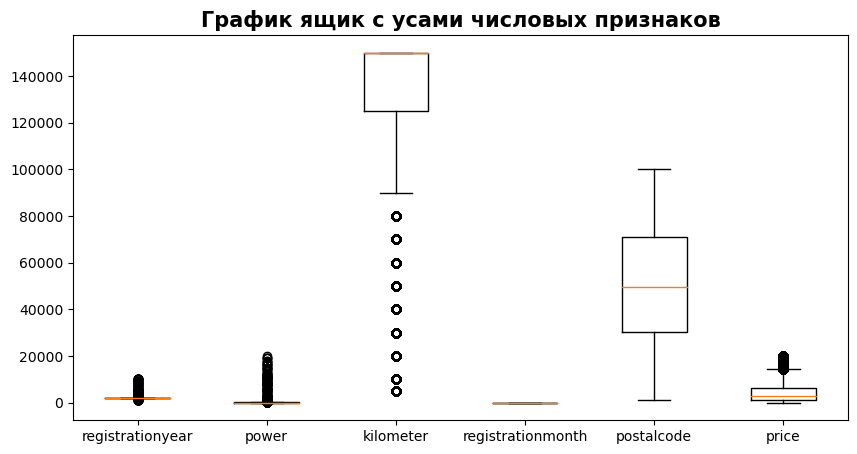

In [51]:
box_mustache(data, int64_columns)

Выбросы есть в четырёх признаках

In [52]:
data.shape

(354365, 15)

In [53]:
number_list = ['registrationyear', 'power',  'kilometer', 'price']
data = cut_crap(data,  number_list)

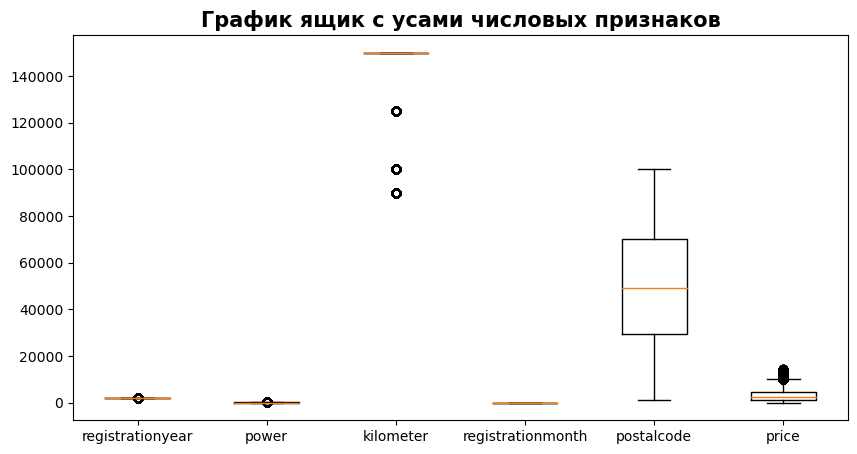

,registrationyear,power,kilometer,registrationmonth,postalcode,price
count,281953.000000,281953.000000,281953.000000,281953.000000,281953.000000,281953.000000
mean,2002.703060,116.661710,142662.269953,5.703720,50263.492415,3432.936149
std,6.114641,41.762309,16138.263777,3.740799,25650.599996,3090.749284
min,1986.000000,50.000000,90000.000000,0.000000,1067.000000,100.000000
25%,1999.000000,86.000000,150000.000000,3.000000,29664.000000,1099.000000
50%,2002.000000,108.000000,150000.000000,6.000000,49090.000000,2400.000000
75%,2006.000000,143.000000,150000.000000,9.000000,70376.000000,4800.000000
max,2019.000000,246.000000,150000.000000,12.000000,99998.000000,14295.000000


In [54]:
box_mustache(data, int64_columns)
display(data[int64_columns].describe())

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

С аномальными значениями успешно справились 👍
</div>

Убрали выбросы, заполнили нулевые и малые значения средним<br>
Посмотрим на признак `registrationmonth` в нём есть нулевое значение, что так же ошибка<br>
Соотнесём влияние месяца регистрации автомобиля на стоимость<br>


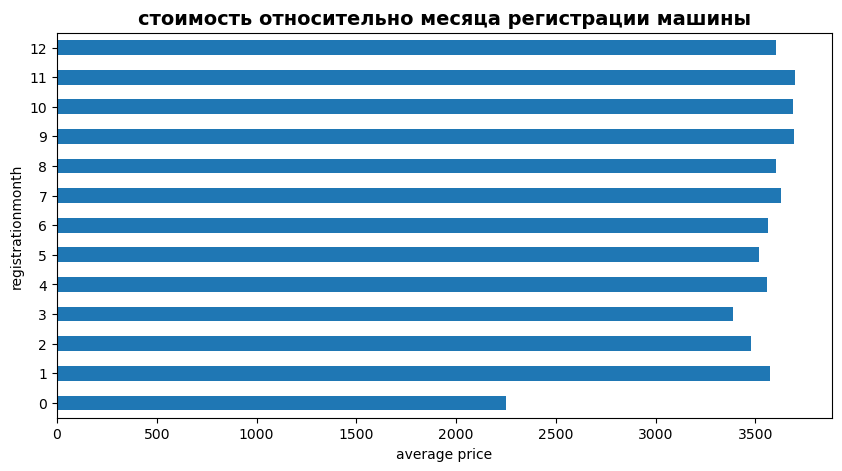

In [55]:
# стоимость и ремонт
fig, ax = plt.subplots(figsize=(12, 8))
data.groupby('registrationmonth')['price'].agg('mean') \
    .plot(kind='barh',  align='center', figsize=(10,5)) \
    .set_title('стоимость относительно месяца регистрации машины', dict(fontweight='bold', fontsize=14));
ax.set_xlabel('average price');

Видим, что месяц регистрации автомобиля сильно не влияет на стоимость<br>
Разница существует, но не значительная <br>
Потенциально рассматриваем этот признак возможным для удаления<br>





Посмотрим на корреляцию числовых признаков с ценой



In [56]:
def corr_psk(data):
    fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(26, 12))

    sns.heatmap(data=data.corr(), annot=True, ax=ax) \
        .set_title('Корреляция Пирсона', weight='bold', size='large');
    sns.heatmap(data=data.corr(method='spearman'), annot=True, ax=ax1) \
        .set_title('Корреляция Спирмена', weight='bold', size='large');
    sns.heatmap(data=data.corr(method='kendall'), annot=True, ax=ax2) \
        .set_title('Корреляция Кенделла', weight='bold', size='large');
    sns.heatmap(data=data.phik_matrix(interval_cols=data.columns), annot=True, ax=ax3) \
        .set_title('Корреляция $\phi_K$', weight='bold', size='large');

    plt.show()

/Users/maximlarin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


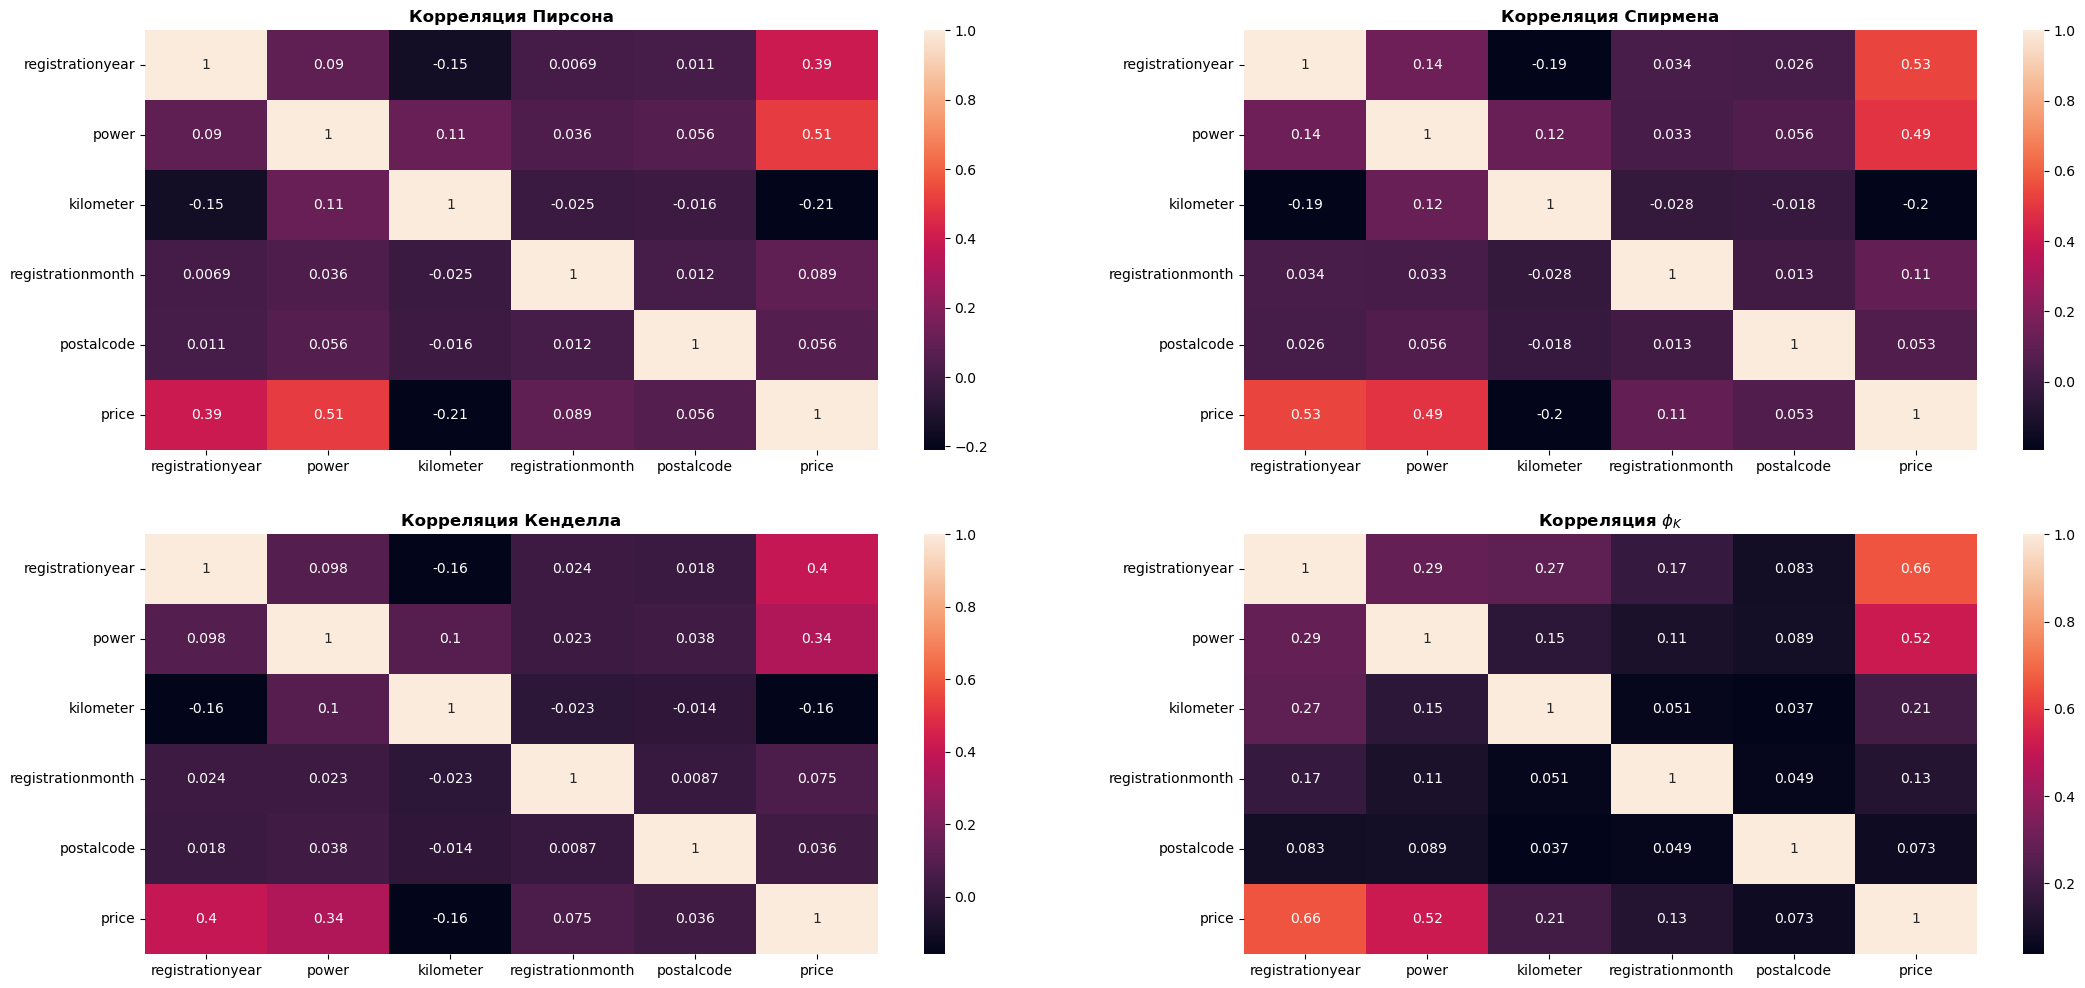

In [57]:
corr_psk(data[int64_columns])

Рассматриваем корреляцию признаков с целевым признаком `price` по трём основным методам кроме $\phi_K$<br>
<br>
Видим корреляцию средней силы по Спирмену у признаков `registrationyear` `power` <br>
Корреляция Пирсона и Кендала у признаков `registrationyear` `power` слабая<br>
Свяь признака `registrationmonth` и `price` на всех схемах очень слабая<br>
Признак `kilometer` на всех схемах имеет слабую обратную корреляцию, всё логично, больше километраж меньше цена<br>
Признак `postalcode` имеет очень слабую корреляцию на всех графиках, рассматриваем его как претендента на удаление<br>


Посмотрим на scater plot графике как коррелирует целевая переменная и числовые признаки

In [58]:
exam_sample = data.sample(frac=0.1, replace=True, random_state=RANDOM_STATE)
exam_sample.shape

(28195, 15)

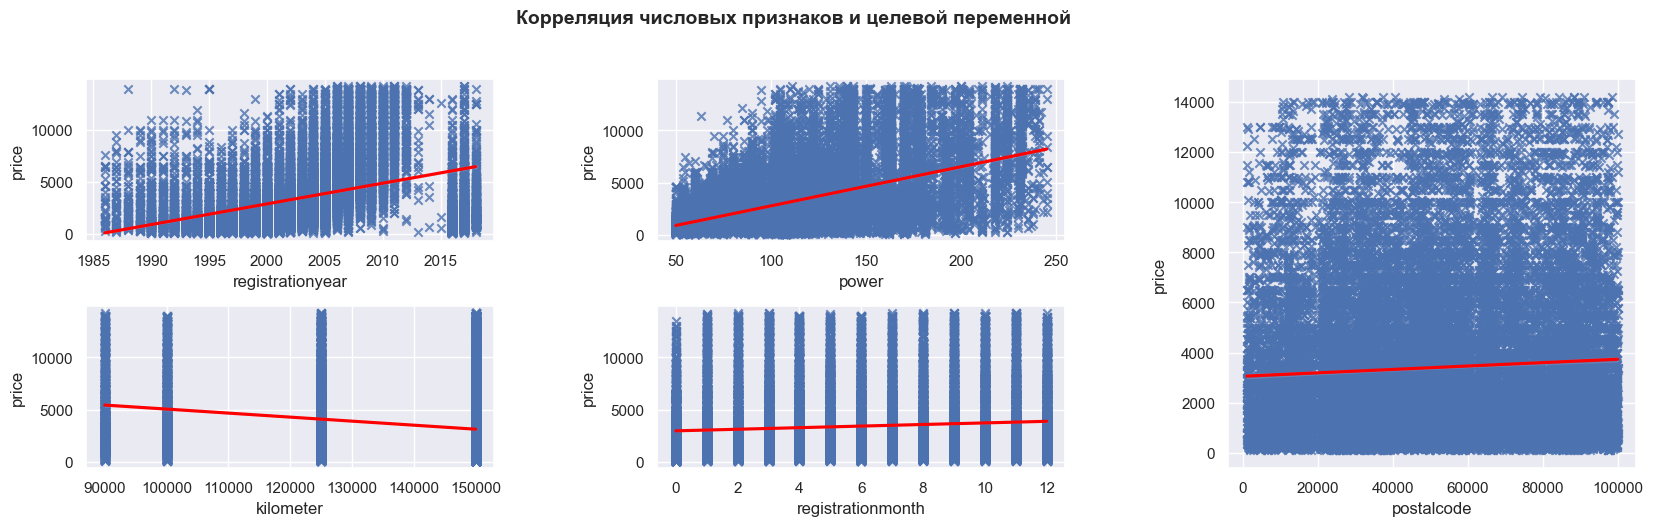

In [59]:
# скаттер плот корреляции целевого признака с признаками
sns.set_theme()
fig = plt.figure(figsize=(20,8))
ax = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0))
ax3 = plt.subplot2grid((3, 3), (1, 1))
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
fig.text(0.34, 0.95,'Корреляция числовых признаков и целевой переменной', dict(fontweight='bold', fontsize=14))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.regplot(data=exam_sample, x='registrationyear', y='price', ax=ax, line_kws={'color':'red'}, marker='x')
sns.regplot(data=exam_sample, x='power', y='price', ax=ax1, line_kws={'color':'red'}, marker='x')
sns.regplot(data=exam_sample, x='kilometer', y='price', ax=ax2, line_kws={'color':'red'}, marker='x')
sns.regplot(data=exam_sample, x='registrationmonth', y='price', ax=ax3, line_kws={'color':'red'}, marker='x')
sns.regplot(data=exam_sample, x='postalcode', y='price', ax=ax4, line_kws={'color':'red'}, marker='x')

plt.show()

Видим, что как предполагали ранее признак `registrationmonth` демонстрирует отсутствие связи с `price` <br>
Признак `postalcode` изменяется не значительно можем им пренебречь <br>
Удалим эти признаки


In [60]:
data = data.drop(columns=['registrationmonth', 'postalcode'], axis=1)
for i in ['registrationmonth', 'postalcode']:
    int64_columns.remove(i)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

### посмотрим категориальные признаки

 категориальный признак `brand` и `model`

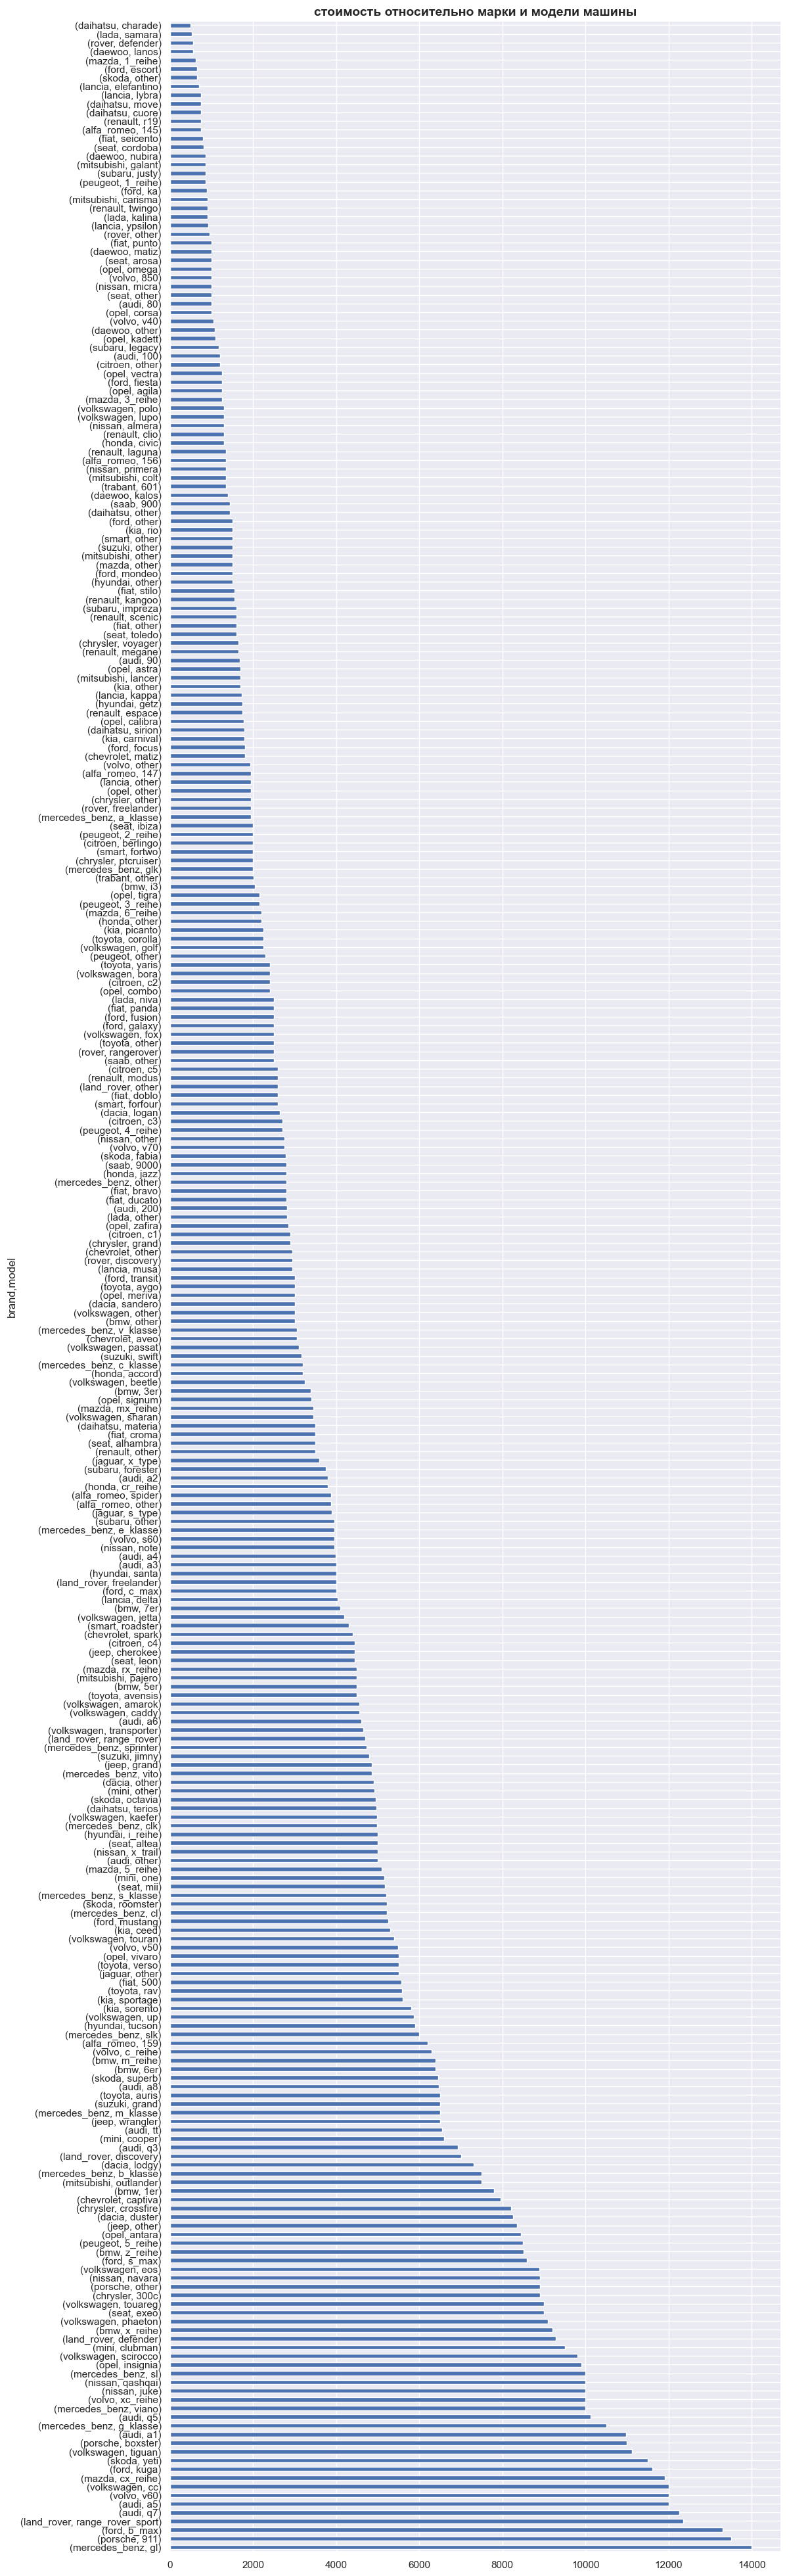

In [61]:
brand_exam = data.groupby(['brand', 'model'])['price'].agg('median') \
    .sort_values(ascending=False).plot(kind='barh',  align='center', figsize=(12,50)) \
    .set_title('стоимость относительно марки и модели машины', dict(fontweight='bold', fontsize=14));

Видим, что цена зависит как от марки так и от модели автомобиля<br>
посмотрим на остальные категориальные признаки

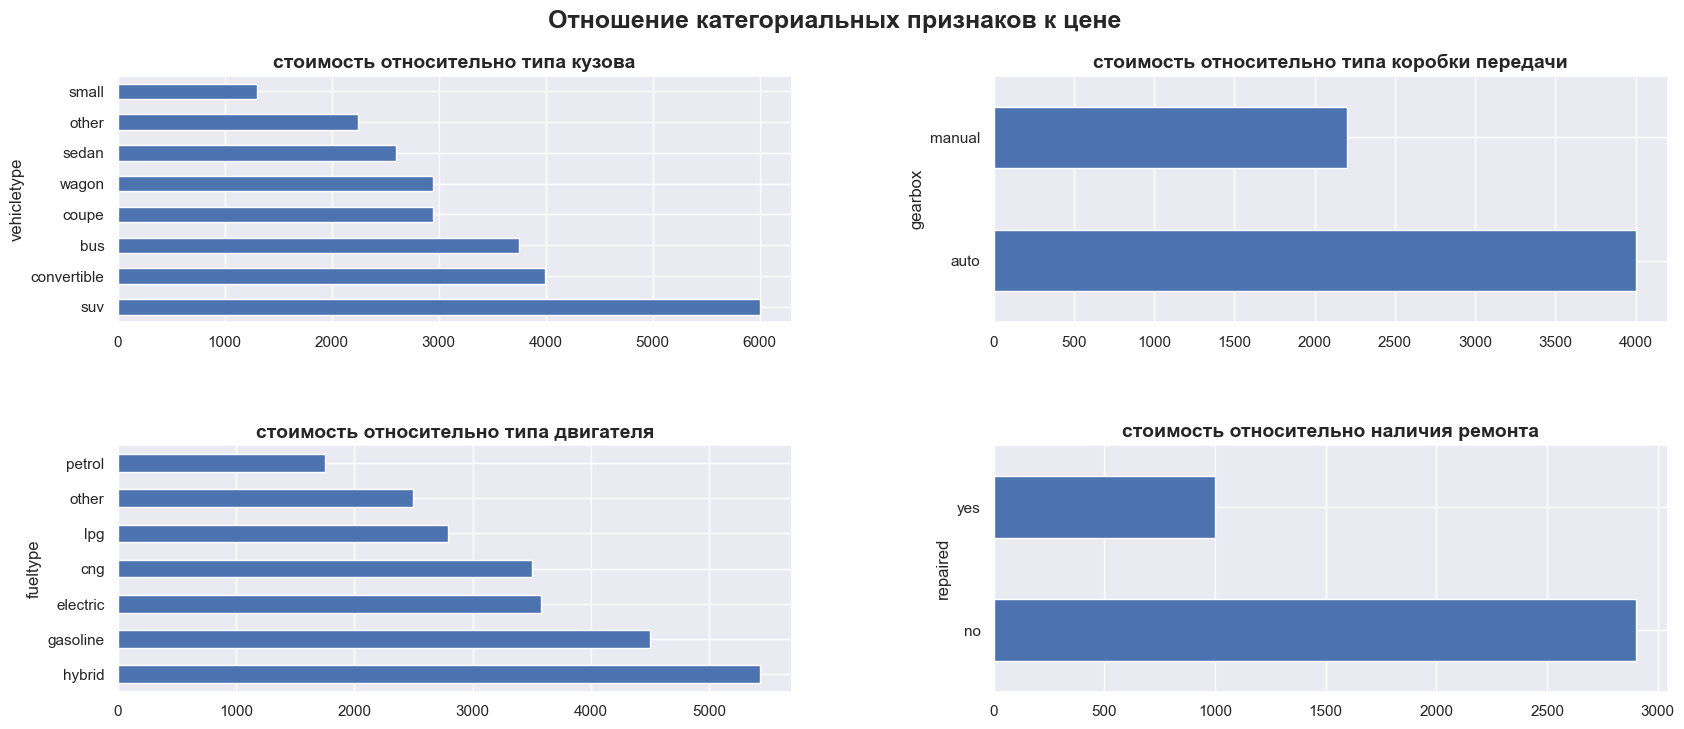

In [62]:
sns.set_theme()
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.text(0.34, 0.94, 'Отношение категориальных признаков к цене', dict(fontweight='bold', fontsize=18));

data.groupby('vehicletype')['price'].agg('median').sort_values(ascending=False).plot(kind='barh', ax=ax, align='center') \
    .set_title(f'стоимость относительно типа кузова', dict(fontweight='bold', fontsize=14));
data.groupby('gearbox')['price'].agg('median').sort_values(ascending=False).plot(kind='barh', ax=ax1, align='center') \
    .set_title(f'стоимость относительно типа коробки передачи', dict(fontweight='bold', fontsize=14));
data.groupby('fueltype')['price'].agg('median').sort_values(ascending=False).plot(kind='barh', ax=ax2, align='center') \
    .set_title(f'стоимость относительно типа двигателя', dict(fontweight='bold', fontsize=14));
data.groupby('repaired')['price'].agg('median').sort_values(ascending=False).plot(kind='barh', ax=ax3, align='center') \
    .set_title(f'стоимость относительно наличия ремонта', dict(fontweight='bold', fontsize=14));

plt.show()

Видим, что категориальные признаки имеют значительное влияние на стоимость

In [63]:
data['datecrawled'] = data['datecrawled'].dt.day
data['datecreated'] = data['datecreated'].dt.day
data['lastseen'] = data['lastseen'].dt.day

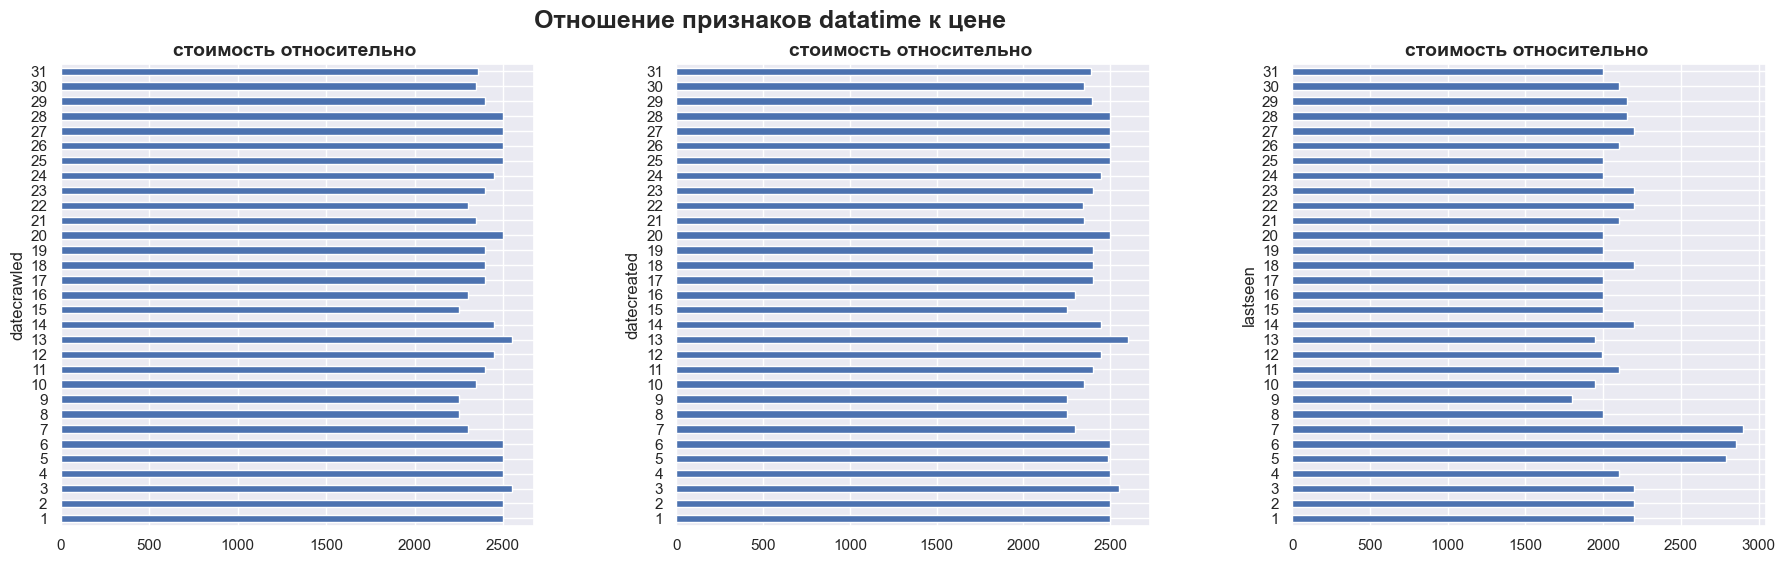

In [64]:
sns.set_theme()
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(22, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.text(0.34, 0.94, 'Отношение признаков datatime к цене', dict(fontweight='bold', fontsize=18));

data.groupby('datecrawled')['price'].agg('median').plot(kind='barh',  align='center', ax=ax) \
    .set_title(f'стоимость относительно ', dict(fontweight='bold', fontsize=14));
data.groupby('datecreated')['price'].agg('median').plot(kind='barh',  align='center', ax=ax1) \
    .set_title(f'стоимость относительно ', dict(fontweight='bold', fontsize=14));
data.groupby('lastseen')['price'].agg('median').plot(kind='barh',  align='center', ax=ax2) \
    .set_title(f'стоимость относительно ', dict(fontweight='bold', fontsize=14));


plt.show()

Признаки `datetime` не оказывают влияния на стоимость удалим их

In [65]:
data = data.drop(columns=['datecrawled', 'datecreated', 'lastseen'], axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

Посмотрим есть ли связь между годом регистрации машины и историей ремонта

In [66]:
exam_repaire = data.copy()
exam_repaire['new_repaired'] = exam_repaire['repaired'].map({'yes': 'yes', 'no': 'no', np.nan: 'unknown'})
n = (exam_repaire['repaired']=='no').sum()
y = (exam_repaire['repaired']=='yes').sum()
u = exam_repaire['repaired'].isna().sum()
len_list_class_repair = [n, u, y]

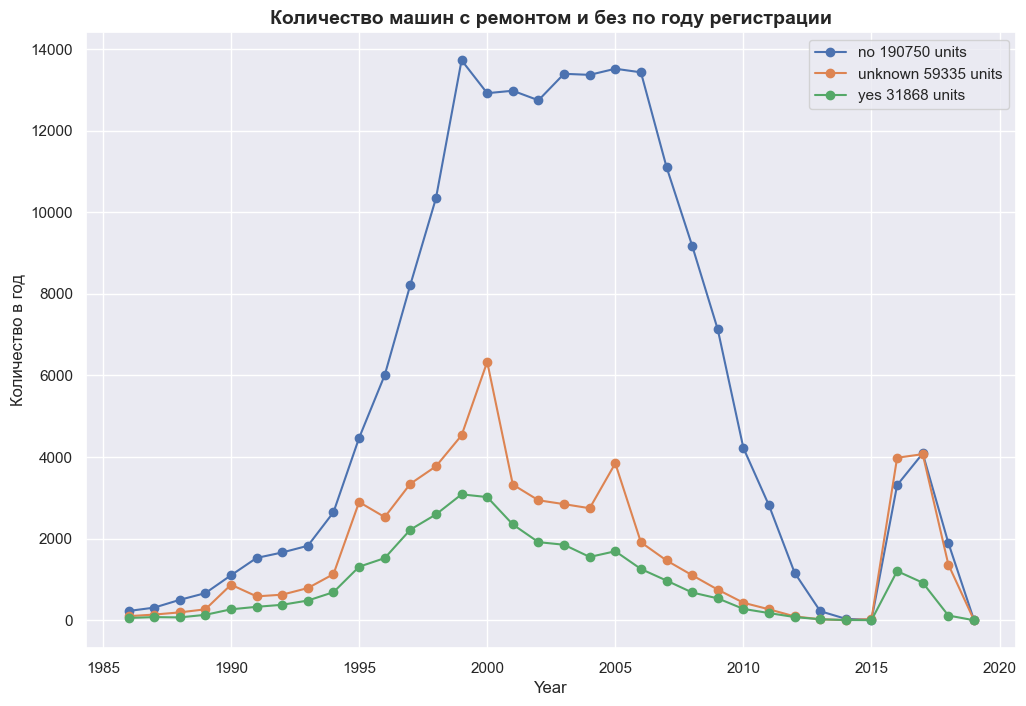

In [67]:

repai = exam_repaire.groupby(['registrationyear', 'new_repaired'])['repaired'].agg('size').reset_index()

groups = repai.groupby('new_repaired')
fig, ax = plt.subplots(figsize=(12, 8))
c = 0
for name, group in groups:
    ax.plot(group['registrationyear'], group['repaired'], marker='o', label=f'{name} {len_list_class_repair[c]} units')
    c += 1
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Количество в год')
ax.set_title('Количество машин с ремонтом и без по году регистрации', dict(fontweight='bold', fontsize=14))
plt.show()

Однозначно разделения нет и невозможно определить по году был ремонт у машины или не был<br>
Поставим заглушку на пропуски в категориальных признаках

In [68]:
data[object_columns] = data[object_columns].fillna('unknown')
display(data.describe(include=object))
display(data.describe(include=np.number))

,vehicletype,gearbox,model,fueltype,brand,repaired
count,281953,281953,281953,281953,281953,281953
unique,9,3,245,8,40,3
top,sedan,manual,golf,petrol,volkswagen,no
freq,73394,220755,24497,168257,63858,190750


,price,registrationyear,power,kilometer
count,281953.000000,281953.000000,281953.000000,281953.000000
mean,3432.936149,2002.703060,116.661710,142662.269953
std,3090.749284,6.114641,41.762309,16138.263777
min,100.000000,1986.000000,50.000000,90000.000000
25%,1099.000000,1999.000000,86.000000,150000.000000
50%,2400.000000,2002.000000,108.000000,150000.000000
75%,4800.000000,2006.000000,143.000000,150000.000000
max,14295.000000,2019.000000,246.000000,150000.000000


Отлично заполнили пропуски и удалили мало значимые признаки<br>
Поделим на выборки<br>
Закодируем категориальные признаки<br>
И масштабируем числовые


In [69]:
signs = data.drop(columns='price', axis=1).copy()
target = data['price'].copy()
stratify = data['brand'].copy()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(signs, target, train_size=0.7, random_state=RANDOM_STATE, stratify=stratify)
stratify = X_test['brand'].copy()
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=RANDOM_STATE, stratify=stratify)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [71]:
int64_columns.remove('price')

In [72]:
LR_X_train, LR_X_valid = X_train.copy(), X_valid.copy()
enc = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
enc.fit(LR_X_train[object_columns])

OneHotEncoder(drop='first', sparse=False)

In [73]:
LR_X_train[enc.get_feature_names()] = enc.transform(LR_X_train[object_columns])
LR_X_valid[enc.get_feature_names()] = enc.transform(LR_X_valid[object_columns])


LR_X_train = LR_X_train.drop(object_columns, axis=1)
LR_X_valid = LR_X_valid.drop(object_columns, axis=1)


/var/folders/br/23knr0_j1fx99l5bfwsv2r9w0000gn/T/ipykernel_25388/1355756128.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  LR_X_train[enc.get_feature_names()] = enc.transform(LR_X_train[object_columns])
/var/folders/br/23knr0_j1fx99l5bfwsv2r9w0000gn/T/ipykernel_25388/1355756128.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  LR_X_train[enc.get_feature_names()] = enc.transform(LR_X_train[object_columns])
/var/folders/br/23knr0_j1fx99l5bfwsv2r9w0000gn/T/ipykernel_25388/1355756128.py:1: PerformanceWarning: DataFrame is hig

In [74]:
scaler = StandardScaler()
LR_X_train[int64_columns] = scaler.fit_transform(LR_X_train[int64_columns])
LR_X_valid[int64_columns] = scaler.transform(LR_X_valid[int64_columns])


In [75]:
label_encoder = LabelEncoder()

for i in object_columns:
    label_encoder.fit(X_train[i])
    X_train[f'new_{i}'] = label_encoder.transform(X_train[i])
    X_valid[f'new_{i}'] = label_encoder.transform(X_valid[i])
    X_test[f'new_{i}'] = label_encoder.transform(X_test[i])

X_train = X_train.drop(columns=object_columns, axis=1)
X_valid = X_valid.drop(columns=object_columns, axis=1)
X_test = X_test.drop(columns=object_columns, axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Для моделей, основанных на деревьях решений, порядковое кодирование отлично подойдет 👍
</div>

In [ ]:
numeric = ['registrationyear', 'power', 'kilometer']
scaler = StandardScaler().fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
X_valid.head()

Подготовили данные обучим пару моделей

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отлично, признаки масштабированы 👍 Не забыли, что fit нужно делать только на train выборке.
</div>

### Вывод

После пред обработки данных из 16 изначальных признаков оставили 10 вместе с целевым <br>
Остальные удалили из-за их малого значения, удалили следующие признаки <br>
`DateCrawled, DateCreated, LastSeen, numberofpictures, postalcode, registrationmonth`<br>
Признак `power` и `price` обработали нулевые значения и малые значения заполнив их средним<br>
Сгруппированным по признаку `brend`, сравнили распределение признаков до и после заполнения <br>

Пропуски в 5 столбцах категориального типа `object` заполнили значение `unknown` <br>
Удалили выбросы в числовых данных используя размах ящика с усами<br>
Удалили 4 полных дубликата<br>

Построили графики для числовых признаков проверили распределение<br>
Распределения со сдвигами и несколькими пиками  <br>
Признак `price` имеет распределение с левым обрывом<br>

Рассмотрели корреляцию признаков с целевым признаком price по трём основным методам<br>
Присутствует корреляцию средней силы по Спирмену у признаков `registrationyear, power` с целевым<br>

Построили скаттер графики показывающие корреляцию признаков с целевым и удалили признаки<br>
`registrationmonth, postalcode` по результатам наблюдений<br>

Использовали `LabelEncoder библиотеки sklern` для кодирования категориальных признаков
И `StandardScaler` для масштабирования числовых признаков

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Данные успешно обработаны 👍
</div>

## Обучение моделей

### LinearRegression

In [ ]:
%%time
# optuna.logging.disable_default_handler()


def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    normalize = trial.suggest_categorical('normalize', [True, False])
    copy_X = trial.suggest_categorical('copy_X', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept, copy_X=copy_X)
    model.fit(LR_X_train, y_train)
    y_pred = model.predict(LR_X_valid)

    return mean_squared_error(y_valid, y_pred, squared=False)
LR_study = optuna.create_study(direction='minimize')
LR_study.optimize(objective, n_trials=8)
print(f"Best parameters: {LR_study.best_params}")
print(f"Best score: {LR_study.best_value:.2f}")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для линейных моделей лучше использовать прямое кодирование
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Поправил</b> 
</div>

```python
# прямое кодирование (для линейных моделей)
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_valid_ohe = pd.get_dummies(features_valid, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)
# после прямого кодирования кол-во признаков в выборках будет отличаться
# поэтому стоит удалить лишние признаки в каждой выборке
```

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Для прямого кодирования также есть вариант с fit и transform - OneHotEncoder из sklearn.
  
Вот блокнот с объяснением OneHotEncoder, make_column_transformer и make_pipeline:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
</div>

###  LightGBM

In [ ]:
%%time

def objective(trial):
    # Define the hyperparameters to be tuned
    params = {
        'metric': 'rmse',
        'num_leaves': trial.suggest_int('num_leaves', 80, 85),
        'learning_rate': trial.suggest_loguniform('learning_rate',0.08794113388460592, 0.08794113389460592),
        'n_estimators': trial.suggest_int('n_estimators', 3300, 3310),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.22141662946848895, 0.22141662946868895),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.08986338849539488, 0.08986338849539888),
        'min_child_samples': trial.suggest_int('min_child_samples', 15, 20),
        'random_state': RANDOM_STATE
    }

    # Create the LGBMRegressor model with the sampled hyperparameters
    model = LGBMRegressor(**params)

    # Fit the model to the training data with early stopping and GPU pruning
    model.fit(X_train, y_train,
              eval_set=[(X_valid, y_valid)],
              early_stopping_rounds=50,
              callbacks=[LightGBMPruningCallback(trial, 'rmse')])

    # Use the trained model to predict on the testing data
    y_pred = model.predict(X_valid)

    # Calculate the RMSE on the testing data
    rmse = mean_squared_error(y_valid, y_pred, squared=False)

    # Return the RMSE as the objective value to be minimized by Optuna
    return rmse

# Create the Optuna study and run the optimization
LGBM_study = optuna.create_study(direction='minimize')
LGBM_study.optimize(objective, n_trials=10)

# Print best hyperparameters and best RMSE
print('Best hyperparameters: {}'.format(LGBM_study.best_params))
print('Best RMSE: {:.4f}'.format(LGBM_study.best_value))

[I 2023-03-25 23:48:02,757] A new study created in memory with name: no-name-caa86044-6209-4232-baf8-37e08e5c1fdd
<timed exec>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
<timed exec>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
<timed exec>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[W 2023-03-25 23:48:02,767] Trial 0 failed with parameters: {'n_estimators': 710, 'max_depth': 7, 'learning_rate': 0.017059244158503913, 'subsample': 0.5942825979600739, 'colsample_bytree': 0.7

NameError: name 'XGBRegressor' is not defined

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

### Catboost

In [66]:
%%time
# Define objective function for Optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 800, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.09893673514150166, 0.09893673514180166),
        'depth': trial.suggest_int('depth', 6, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.10043417270317233, 0.10043417270357233),
        'random_strength': trial.suggest_loguniform('random_strength', 2.6251862551813288, 2.6251862551853288),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.013059768938083083, 0.013059768938086083)
    }

    # Train model with given hyperparameters
    model = CatBoostRegressor(**params, loss_function='RMSE', random_seed=42)#  task_type='GPU',
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

    # Return RMSE
    y_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    return rmse

# Run optimization
CB_study = optuna.create_study(direction='minimize')
CB_study.optimize(objective, n_trials=10)

# Print results
print('Best trial:')
trial = CB_study.best_trial
print('  Score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-03-18 13:25:37,903] A new study created in memory with name: no-name-4c2551c4-7db4-4ed7-b888-215f836d2440
[I 2023-03-18 13:27:39,582] Trial 0 finished with value: 1317.4678296454415 and parameters: {'iterations': 1725, 'learning_rate': 0.09893673514155746, 'depth': 10, 'l2_leaf_reg': 0.10043417270334931, 'random_strength': 2.6251862551826837, 'bagging_temperature': 0.013059768938084219}. Best is trial 0 with value: 1317.4678296454415.


Best trial:
  Score: 1317.4678296454415
  Params: 
    iterations: 1725
    learning_rate: 0.09893673514155746
    depth: 10
    l2_leaf_reg: 0.10043417270334931
    random_strength: 2.6251862551826837
    bagging_temperature: 0.013059768938084219
CPU times: user 3min 35s, sys: 3.33 s, total: 3min 38s
Wall time: 2min 1s


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

In [67]:
best_result_rmse = {'LinearRegression':f'{LR_study.best_value:.2F}',
    'LGBMRegressor': f'{LGBM_study.best_value:.2F}',
    'CatBoostRegressor': f'{CB_study.best_value:.2F}'}

best_result_rmse = pd.DataFrame([best_result_rmse], index=['best_scorr_rmse'])
best_result_rmse.T

,best_scorr_rmse
LinearRegression,1879.39
LGBMRegressor,1312.15
CatBoostRegressor,1317.47


### Вывод

Обучили и подобрали гиперпараметры для трёх моделей <br>
`LinearRegression, LGBMRegressor, CatBoostRegressor` <br>
Наименьшую ошибку RMSE показали модели `LGBMRegressor, CatBoostRegressor`<br>
Исследуем их по критерию скорость 


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По модельной части замечаний нет - обучение выполнено четко 💪
</div>

## Анализ моделей

In [68]:
model = CatBoostRegressor(**CB_study.best_params)#  task_type='GPU',
%time model.fit(X_train, y_train)
# **lgbm_cv_model.best_params_
# # Return RMSE
%time y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0:	learn: 2900.0252815	total: 68.9ms	remaining: 1m 58s
1:	learn: 2725.6101084	total: 137ms	remaining: 1m 57s
2:	learn: 2573.9234647	total: 202ms	remaining: 1m 55s
3:	learn: 2444.4133058	total: 268ms	remaining: 1m 55s
4:	learn: 2333.0099551	total: 337ms	remaining: 1m 56s
5:	learn: 2235.2852898	total: 405ms	remaining: 1m 56s
6:	learn: 2148.4685401	total: 471ms	remaining: 1m 55s
7:	learn: 2072.0800602	total: 540ms	remaining: 1m 55s
8:	learn: 2001.2871270	total: 613ms	remaining: 1m 56s
9:	learn: 1942.1983104	total: 681ms	remaining: 1m 56s
10:	learn: 1886.1213843	total: 749ms	remaining: 1m 56s
11:	learn: 1835.6070992	total: 816ms	remaining: 1m 56s
12:	learn: 1792.9668871	total: 883ms	remaining: 1m 56s
13:	learn: 1756.6666932	total: 950ms	remaining: 1m 56s
14:	learn: 1727.5429930	total: 1.02s	remaining: 1m 55s
15:	learn: 1700.6107972	total: 1.08s	remaining: 1m 55s
16:	learn: 1674.3958956	total: 1.15s	remaining: 1m 55s
17:	learn: 1654.3468786	total: 1.22s	remaining: 1m 55s
18:	learn: 1634.760

1318.0164593996749

In [72]:
LGBM_model = LGBMRegressor(**LGBM_study.best_params)#  task_type='GPU',
%time LGBM_model.fit(X_train, y_train)

%time y_pred = LGBM_model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

CPU times: user 1min 2s, sys: 1.58 s, total: 1min 3s
Wall time: 33.3 s
CPU times: user 12.4 s, sys: 20 ms, total: 12.4 s
Wall time: 6.55 s


1319.6722895265154

**Ошибка RMSE LinearRegression на валидационных данных  `1879.39`**<BR>
Общее время на поиск гипер-параметров обучение и предсказание  3min 34s<BR>
По затраченному времен LinearRegression, но и качество самое низкое<BR>
<BR>
**Ошибка RMSE CatBoostRegressor на валидационных данных  `1318.01`**<BR>
Время потраченное на поиск лучших гипер-параметров модели CatBoostRegressor с малым количеством перебора<BR>
Без использования GPU составило 15min 16s<BR>
Обучение модели CatBoostRegressor заняло 3min 37s<BR>
Расчет предсказания составил 501 ms<BR>


**Ошибка RMSE LGBMRegressor на валидационных данных  `1319.67`**<BR>
Время потраченное на поиск лучших гипер-параметров модели LGBMRegressor с малым количеством перебора<BR>
Без использования GPU составило 3min 13s<BR>
Обучение модели CatBoostRegressor заняло 1min 3s<BR>
Расчет предсказания составил 6.55 s<BR>


Исходя из качества моделей по величине RMSE ошибки с учётом временного анализа лучшая модель `LGBMRegressor`<BR>
Выбираем её для проверки на тестовых данных


<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

В сравнении нужно смотреть отдельно на время обучения и время предсказания для каждой модели.
    
Анализ моделей должен выглядеть так:

1. RMSE вычисляется на валидационной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_valid)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Поправил</b> 
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Приятно было бы видеть результаты в информативной таблице
</div>

## Тестирование лучшей модели

In [73]:
%%time
LGBM_model = LGBMRegressor(**LGBM_study.best_params)#  task_type='GPU',
%time LGBM_model.fit(X_train, y_train)

%time y_pred = LGBM_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

CPU times: user 1min 2s, sys: 1.57 s, total: 1min 4s
Wall time: 33.5 s
CPU times: user 12.8 s, sys: 18.6 ms, total: 12.8 s
Wall time: 6.79 s
CPU times: user 1min 15s, sys: 1.59 s, total: 1min 16s
Wall time: 40.3 s


1307.7243173017484

### Вывод

Мы подготовили модель LGBMRegressor для предсказания рыночной стоимости автомобилей<br>
Удовлетворяющею заданным критериям по качеству и скорости <br>
Можно готовить прототип на её основе для испытаний в реальных условиях


## Вывод финал 
Для сервиса не «Не бит, не крашен» разработали модель удовлетворяющих требованиям <br>
По качеству и скорости <br>
* модель LGBMRegressor со значением RMSE 1307.72

В процессе разработки и подготовки данных удалили признаки<br>
`DateCrawled, DateCreated, LastSeen, numberofpictures, postalcode, registrationmonth`<br>
Оставив признаки <br>
`registrationyear, power, kilometer, vehicletype,
gearbox, model, fueltype, brand, repaired`<br>
Пропуски в 5 столбцах категориального типа `object` заполнили значение `unknown` <br>
Удалили выбросы в числовых данных используя размах ящика с усами<br>
Удалили 4 полных дубликата<br>

Построили графики для числовых признаков проверили распределение<br>

Построили скаттер графики показывающие корреляцию признаков с целевым<br>

Использовали `LabelEncoder библиотеки sklern` для кодирования категориальных признаков<br>
И `StandardScaler` для масштабирования числовых признаков для моделей градиентного спуска<br>

Использовали `OneHotEncoder библиотеки sklern` для кодирования категориальных признаков<br>
И `StandardScaler` для масштабирования числовых признаков для модели LinearRegression<br>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"